<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 31

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
```
git reset --hard origin/main
```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

# For interacting with the plots:
#%matplotlib notebook

## Outline for today

* Introduction to unsupervised learning: dimensionality reduction
* Principal Component Analysis (PCA) method

**Reading material**: This notebook + (Section 20.1)

## Supervised vs Unsupervised learning

So far in this course we only studied cases when our data $\mathcal{D}$ contained both input (feature) data $\mathcal{D}_x$ and output (target or label) data $\mathcal{D}_y$. This is called **Supervised Learning**.

* Supervised learning includes all cases when we try to find a model capable of predicting a new output $\mathbf{y}^*$ for a given input $\mathbf{x}^*$ by training that model on $N$ pairs of data points ($\mathbf{x}_n, \mathbf{y}_n$).

But there are many cases in real life where your dataset only has input (feature) data $\mathcal{D}_x$. This is called **Unsupervised Learning**.

* A common scenario of unsupervised learning? **Dimensionality reduction**!

## Dimensionality reduction

Reducing dimensionality is one of the essential aspects of intelligence.

* At its most basic form, dimensionality reduction can be used for **Data Visualization**.

* In the limit, however, it leads to the simplest (but not simpler) model that explains a phenomenon. For example, the discovery of a fundamental Law of Physics like Newton's 2nd law.

Today, we will focus on the simplest form of dimensionality reduction by aiming at **Data Visualization**.

**Data visualization** by performing dimensionality reduction is extremely important in machine learning.

When we train models in high-dimensional spaces, it becomes very difficult to visualize and understand what the models are predicting.

Do you recall an example covered in this course where knowing about dimensionality reduction would have been very useful?

* When we learned about classification of the 3 Iris flower species! Remember that the dataset had:
    - 4 input features: petal width and length, and sepal width and length
    - 3 output labels: iris-virginica, iris-setosa, iris-versicolor (Iris flower species)

* But we were unable to visualize the impact of all 4 input variables on the classification of the flowers
    - Instead, we created contour plots considering only 2 input variables at a time.
    - In fact, we actually found that we were able to train decent models even by **only using 2 input features**!

Today we will find that we can classify **equally well** the 3 flowers using input data with lower dimensionality!

* This will illustrate the importance of dimensionality reduction for:
    - Data Visualization
    - Training simpler models (e.g. a supervised classifier for the Iris dataset!)

### Principal Component Analysis (PCA)

Let's start with the simplest and (very widely used) dimensionality reduction technique:

* **Principal Component Analysis (PCA)**

As usual, before we mathematically derive the model, let's gain intuition about PCA by applying it to a dataset.

### Iris dataset (unsupervised): PCA example

**Importantly**, for now let's ignore the output labels of the Iris dataset.

* In other words, imagine that you went on the field and start measuring the **petal length**, **petal width**, **sepal length** and **sepal width** of all the flowers you could find, but you had **absolutely no idea** that you were actually measuring these for 3 different types of flower species.

This means that your dataset $\mathcal{D}$ only contains the input feature data $\mathcal{D}_x$.

In [2]:
import pandas as pd

# Load the Iris dataset.
iris_data = pd.read_csv('../data/data_iris.csv')

# Let's consider our dataset only using the input features:
Data_x = iris_data.loc[:, ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',] ]
print(Data_x) # Just print the dataframe of the input data (to remind us about the data)

X_data = Data_x.values # save the numpy array of the inputs X (instead of using the pandas Dataframe)

# As usual, it's good practice to scale the data:
# Note: For the PCA method scikit-learn automatically centers the data...
#       So, using StandardScaler is not actually necessary when using PCA. Still, we will do it.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_data_scaled = scaler.transform(X_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


How can we visualize this 4 dimensional input data?

* Let's reduce it to 3 dimensions with PCA!

In [3]:
# Example modified directly from scikit-learn

from sklearn.decomposition import PCA # import PCA

pca_model = PCA(n_components=3) # Reduce input data to 3 components (instead of the original 4)

pca_model.fit(X_data_scaled) # Determine the parameters of the PCA model

U_data = pca_model.transform(X_data_scaled) # Get the low dimensional data embedding U_nl
# Note: pca_model does not have a "predict" function, as it only takes input data X and encodes it into
#       the reduced data U (the low dimensional representation of X, a.k.a. "latent" data)

# Plot the reduced data (latent U)
fig1, ax1 = plt.subplots() # This opens a new figure
plt.clf() # clear the figure (otherwise it plots 2D axis)
ax1 = fig1.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134) # Create 3D axes
ax1.scatter(U_data[:, 0], U_data[:, 1], U_data[:, 2])
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.zaxis.set_ticklabels([])
ax1.set_xlabel('$u_1$', fontsize=20)
ax1.set_ylabel('$u_2$', fontsize=20)
ax1.set_zlabel('$u_3$', fontsize=20)
ax1.set_title('Input data visualized in the latent space $u_1$, $u_2$, $u_3$', fontsize=20)

plt.close(fig1)

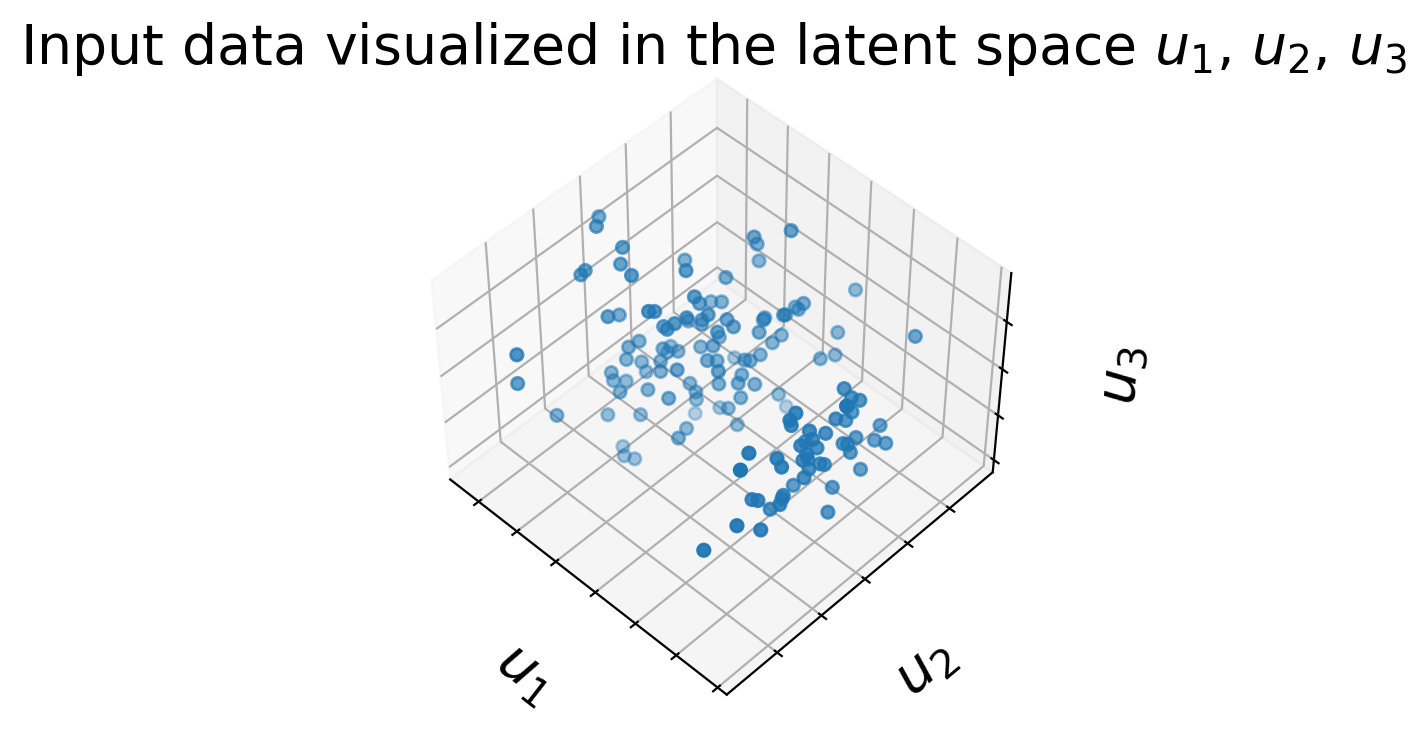

In [4]:
fig1

How many "groups" or "clusters" of data do you see in this latent space representation?

* You clearly see 2 groups of data, but you will soon realize that you can (almost perfectly) distinguish 3 groups!

**For a brief moment**, let's reveal the class label (flower species) of each data point in this 3D latent space that we found using PCA.

(code is hidden in the Notes below)

In [5]:
# Now let's get our output labels for the Iris dataset:

Data_y = iris_data.loc[:, 'Species']

y_strings_data = Data_y.values # save the label data strings into Y_strings_data
y_data = pd.Categorical(pd.factorize(y_strings_data)[0]) # convert to integers


# Plot the reduced data (latent data U) but now showing each class for each point
fig2, ax2 = plt.subplots() # This opens a new figure
plt.clf() # clear the figure (otherwise it plots 2D axis)
ax2 = fig2.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134) # Create 3D axes
ax2.scatter(U_data[:, 0], U_data[:, 1], U_data[:, 2], c=y_data )
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.zaxis.set_ticklabels([])
ax2.set_xlabel('$u_1$', fontsize=20)
ax2.set_ylabel('$u_2$', fontsize=20)
ax2.set_zlabel('$u_3$', fontsize=20)
ax2.set_title('Input data visualized in the latent space $u_1$, $u_2$, $u_3$', fontsize=20)

plt.close(fig2)

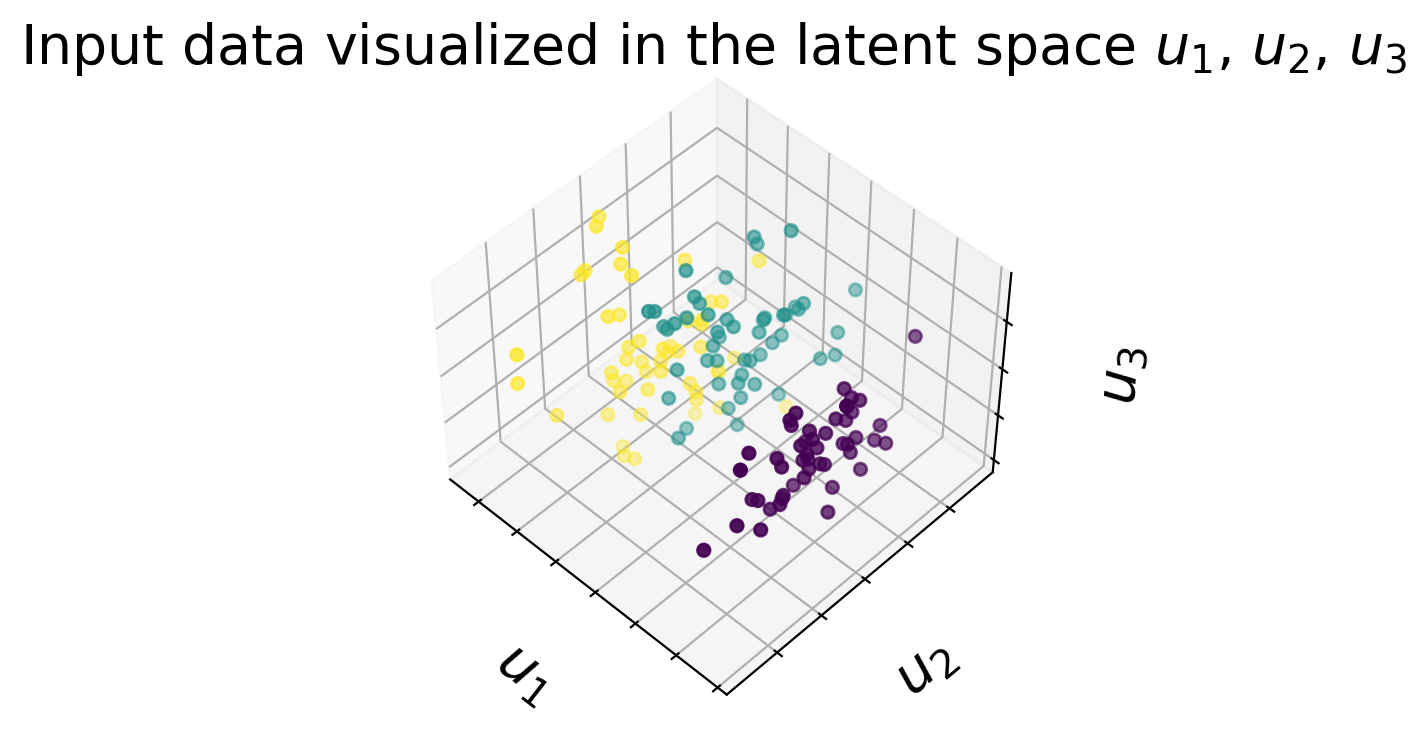

In [6]:
fig2

Visualizing the input data in this reduced space (latent space) makes it easy to distinguish among the 3 flower types!

* You might be thinking: maybe if I use the $n$ data points of reduced space $\mathbf{u}_n$ obtained by PCA as the input to a simple classifier like Logistic regression, then I could get a really nice classification model for the Iris dataset!

**Good thinking!!**

That is one of the uses of dimensionality reduction models! They help us visualize data but they can also be used to preprocess the data and (hopefully!) facilitate training of another model.

**Suggested exercise**: Train a Logistic regression model (go back to Lecture 22) using the input data in reduced space obtained by PCA and check how good your model becomes.

## Understanding PCA

PCA is one of the simplest unsupervised machine learning algorithms.

It takes the high-dimensional input data $\mathbf{x} \in \mathbb{R}^D$ of dimension $D$ and **linearly** transforms it into a lower dimensional latent space $\mathbf{u} \in \mathbb{R}^{D_l}$ of dimension $D_l$, where $D_l < D$.

So, the goal is to find a low dimensional data representation $\mathbf{u}$ that approximates well the original data $\mathbf{x}$.

Broadly, the PCA process is described by two steps:

1. Encoding: We project (or encode) $\mathbf{x}$ to get $\mathbf{u} = \mathbf{W}^T \mathbf{x}$. This has similarities with linear regression, but now $\mathbf{u}$ is unknown even when training!

2. Decoding: We unproject (or decode) $\mathbf{u}$ to *approximately* get $\mathbf{x}^* = \mathbf{W}\mathbf{u}$, i.e. an approximate representation of the input features $\mathbf{x}$ that is also obtained by a linear map with weights collected in the same matrix $\mathbf{W}$

The loss function (or reconstruction error or distortion) is simply the MSE between the original data $\mathbf{x}$ and the reconstructed data $\mathbf{x}^*$:

$$
\mathcal{L}(\mathbf{W}) = \frac{1}{N} ||\mathbf{X} - \mathbf{U}\mathbf{W}^T ||_F^2 = \frac{1}{N} ||\mathbf{X}^T - \mathbf{W}\mathbf{U}^T ||_F^2 =\frac{1}{N} \sum_{n=1}^N ||\mathbf{x}_n - \mathbf{W}\mathbf{u}_n ||^2
$$

Note: More general dimensionality reduction techniques will be defined similarly:

$$
\mathcal{L} = \frac{1}{N} \sum_{n=1}^N ||\mathbf{x}_n - \text{decode}\left(\text{encode}(\mathbf{x}_n;\mathbf{W}_1);\mathbf{W}_2\right) ||_2^2
$$

Where it is important to note that the data $\mathbf{x}_n$ **needs to be centered** (e.g. using StandardScaler) such that $\mathbf{x}_n = \hat{\mathbf{x}}_n-\bar{\mathbf{x}}_n$ where $\bar{\mathbf{x}} = \frac{1}{N}\sum_{n=1}^N \mathbf{x}_n$ is the mean of the data, and $\hat{\mathbf{x}}_n$ is the original data (before centering). We will see why this is required soon.

* It is possible to collect all the input data points $\mathbf{x}_n$ into an $N\times D$ matrix $\mathbf{X}$, and the latent data points $\mathbf{u}_n$ into an $N \times D_l$ matrix $\mathbf{U}$. The weight matrix $\mathbf{W}$ is $D \times D_l$.

The rows of $\mathbf{U}$ contain the low dimension versions of the rows of $\mathbf{X}$. The reconstructed data is obtained by $\mathbf{X}^* = \mathbf{U}\mathbf{W}^T$ or equivalently by $\mathbf{x}^*_n = \mathbf{W}\mathbf{u}_n$ when doing it point by point.

#### Derivation of the PCA point estimate

Although the PCA method is simple to understand, deriving its point estimate (minimum of the loss function) involves a bit of algebra... Let's start!

$$
\mathcal{L}(\mathbf{W}) = \frac{1}{N} \sum_{n=1}^N ||\mathbf{x}_n - \mathbf{x}_n^* ||^2
$$

where $\mathbf{x}^*_n$ is the reconstruction from a lower dimensional latent feature vector $\mathbf{u} \in \mathbb{R}^{D_l}$ with $D_l < D$ the dimensions of the original input data.

First, let's consider we have a **complete** orthonormal basis $\mathbf{w}_i$ where $i=1,2,..., D_l$. Then, we have:

$$
\mathbf{w}_i^T \mathbf{w}_j = \delta_{ij} = \begin{cases} 
      1 \quad, & i=j \\
      0 \quad, & \text{else} 
   \end{cases}
$$

where $\delta_{ij}$ is the Kronecker delta.

If the basis is **complete**, then the latent space dimension $D_l$ is the **same** as the original input space dimension $D$ and we have a square weight matrix $D\times D_l$ with $D_l = D$. So, each column vector of that matrix is:

$\mathbf{w}_i = \begin{bmatrix} w_{1i}\\ w_{2i} \\ \vdots \\ w_{Di} \end{bmatrix}$ where $i = 1, 2, ..., D_l \equiv D$

Since we start by considering a **complete** basis, we know that we can represent **any** vector in $\mathbb{R}^D$ as a linear combination of **all** $D_l$ (i.e. $D$) basis vectors:

$$
\mathbf{x}_n = \sum_{i=1}^D u_{ni}\mathbf{w}_i = \sum_{i=1}^D \mathbf{w}_i  u_{ni}
$$

with $u_{ni}=\mathbf{x}_n^T\mathbf{w}_i = \mathbf{w}_i^T \mathbf{x}_n$.

As the basis are orthonormal ($\mathbf{w}_i^T \mathbf{w}_i = \delta_{ii}$):

$$
\mathbf{x}_n = \sum_{i=1}^D \mathbf{w}_i \mathbf{w}_i^T  \mathbf{x}_{n} = \mathbf{x}_n
$$

However, we do not want to use all $D$ components to reconstruct $\mathbf{x}_n$. Instead, we want to use $D_l < D$ components to get an *approximate* reconstruction $\mathbf{x}^*_n$:

$$
\mathbf{x}^*_n = \sum_{i=1}^{D_l} \mathbf{w}_i u_{ni} = \sum_{i=1}^{D_l} \mathbf{w}_i \mathbf{w}_i^T  \mathbf{x}_{n}
$$

Importantly, we can write the original input points $\mathbf{x}_n$ as:

$$
\mathbf{x}_n = \sum_{i=1}^D \mathbf{w}_i u_{ni} = \sum_{i=1}^{D_l} \mathbf{w}_i u_{ni} + \sum_{i=D_l+1}^D \mathbf{w}_i u_{ni}
$$

where the last term represents the error (basis functions that we did not consider).

So, the reconstruction loss can be rewritten as:

$$\begin{align}
\mathcal{L}(\mathbf{W}) &= \frac{1}{N} \sum_{n=1}^N \left\lVert \sum_{i=1}^{D_l} \mathbf{w}_i \mathbf{u}_{ni} + \sum_{i=D_l+1}^D \mathbf{w}_i \mathbf{u}_{ni} - \sum_{i=1}^{D_l} \mathbf{w}_i \mathbf{u}_{ni} \right\rVert^2\\
  & = \frac{1}{N} \sum_{n=1}^N \left\lVert \sum_{i=D_l+1}^D \mathbf{w}_i \mathbf{u}_{ni} \right\rVert^2\\
  & = \frac{1}{N} \sum_{n=1}^N \left\lVert \sum_{i=D_l+1}^D \mathbf{w}_i \mathbf{w}_i^T \mathbf{x}_n \right\rVert^2\\
\end{align}
$$

This result is intuitive! The error results from the part of the data $\mathbf{x}_n$ that is encoded and decoded by the basis vections that we **did NOT** consider when reconstructing $\mathbf{x}_n$.

Let's proceed:

$$\begin{align}
\mathcal{L}(\mathbf{W}) &= \frac{1}{N} \sum_{n=1}^N \left\lVert \sum_{i=D_l+1}^D \mathbf{w}_i \mathbf{w}_i^T \mathbf{x}_n \right\rVert^2\\
  &= \frac{1}{N} \sum_{n=1}^N \left( \sum_{i=D_l+1}^D \mathbf{w}_i \mathbf{w}_i^T \mathbf{x}_n \right)^T\left( \sum_{j=D_l+1}^D \mathbf{w}_j \mathbf{w}_j^T \mathbf{x}_n\right)\\
  &= \frac{1}{N} \sum_{n=1}^N \left( \sum_{i=D_l+1}^D \mathbf{x}_n^T \mathbf{w}_i \mathbf{w}_i^T  \right)\left( \sum_{j=D_l+1}^D \mathbf{w}_j \mathbf{w}_j^T \mathbf{x}_n\right)\\
  &= \frac{1}{N} \sum_{n=1}^N \sum_{i=D_l+1}^D \sum_{j=D_l+1}^D \mathbf{x}_n^T \mathbf{w}_i \underbrace{\mathbf{w}_i^T  \mathbf{w}_j}_{\delta_{ij}} \mathbf{w}_j^T \mathbf{x}_n\\
  &= \frac{1}{N} \sum_{n=1}^N \sum_{i=D_l+1}^D \mathbf{x}_n^T \mathbf{w}_i \mathbf{w}_i^T \mathbf{x}_n\\
\end{align}
$$

Now, note that the term $\mathbf{x}_n^T \mathbf{w}_i$ and the term $\mathbf{w}_i^T \mathbf{x}_n$ are scalars, so we can transpose each of them individually without changing the result of the expression!

Therefore, the loss function can be rewritten as:

$$\begin{align}
\mathcal{L}(\mathbf{W}) &= \frac{1}{N} \sum_{n=1}^N \sum_{i=D_l+1}^D \left(\mathbf{x}_n^T \mathbf{w}_i \right)^T \left(\mathbf{w}_i^T \mathbf{x}_n\right)^T\\
   &= \frac{1}{N} \sum_{n=1}^N \sum_{i=D_l+1}^D \mathbf{w}_i^T \mathbf{x}_n \mathbf{x}_n^T \mathbf{w}_i\\
   &= \sum_{i=D_l+1}^D \mathbf{w}_i^T \left(\frac{1}{N} \sum_{n=1}^N \mathbf{x}_n \mathbf{x}_n^T \right)\mathbf{w}_i\\
\end{align}
$$

where we now note that the term inside the brackets is the covariance matrix of the **centered** input data for all points $\mathbf{x}_n$ defined in the original input space:

$$
\hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n \mathbf{x}_n^T
$$

Thus, we finally arrive to the expression of the loss function for PCA:

$$
\mathcal{L}(\mathbf{W}) = \sum_{i=D_l+1}^D \mathbf{w}_i^T \hat{\boldsymbol{\Sigma}}\mathbf{w}_i
$$

This loss function needs to be minimized for all $\mathbf{w}_i$. There is a trivial solution for $\mathbf{w}_i=\mathbf{0}$, but the orthonormality condition does not allow this (uninteresting) solution.

Instead, we need to minimize the loss function but satisfy the orthonormality constraint: $\mathbf{w}_i^T \mathbf{w}_j = \delta_{ij}$

This is possible by using Lagrange multipliers and rewriting the loss function as:

$$
\tilde{\mathcal{L}}(\mathbf{W}) = \sum_{i=D_l+1}^D \left[ \mathbf{w}_i^T \hat{\boldsymbol{\Sigma}}\mathbf{w}_i + \lambda_i\left(\underbrace{\delta_{ij} - \mathbf{w}_i^T\mathbf{w}_j}_{\text{constraint}} \right)\right]
$$

Taking the derivative wrt $\mathbf{w}_k$ and equalling it to zero to find the minimum:

$$
\frac{\partial \tilde{\mathcal{L}}(\mathbf{W})}{\partial \mathbf{w}_k} = 0 \quad \Rightarrow \quad \sum_{i=D_l+1}^D \left(2\hat{\boldsymbol{\Sigma}}\mathbf{w}_i -2\lambda_i\mathbf{w}_j\right) = 0
$$

$$
\Rightarrow \quad \hat{\boldsymbol{\Sigma}}\mathbf{w}_i = \lambda_i\mathbf{w}_j \quad \forall_{i\in\{D_l+1, ..., D\}}
$$

$$
\Rightarrow \quad \lambda_i = \mathbf{w}_j^T\hat{\boldsymbol{\Sigma}}\mathbf{w}_i \quad \forall_{i\in\{D_l+1, ..., D\}}
$$

Concluding that the weight vectors $\mathbf{w}_i$ are simply the eigenvalues of $\hat{\boldsymbol{\Sigma}}$ associated to the eigenvalues $\lambda_i$ for $i=D_l+1,...,D$ components.

Substituting this result in the loss function, we can finally find the minimum:

$$\begin{align}
\tilde{\mathcal{L}}(\mathbf{W}) &= \sum_{i=D_l+1}^D \left[ \mathbf{w}_i^T \lambda_i \mathbf{w}_i + \underbrace{\mathbf{w}_j^T\hat{\boldsymbol{\Sigma}}\mathbf{w}_i\left(\delta_{ij} - \mathbf{w}_i^T\mathbf{w}_j \right)}_{=0} \right]\\
&= \sum_{i=D_l+1}^D \mathbf{w}_i^T \lambda_i \mathbf{w}_i\\
  &= \sum_{i=D_l+1}^D \lambda_i
\end{align}
$$

Leading to the **remarkable result** that the error of reconstructing all centered input points $\mathbf{x}_n$ is **minimized** when the basis vectors $\mathbf{w}_i$ are the eigenvectors associated to the **SMALLEST** eigenvalues of the covariance matrix of the centered input data $\hat{\boldsymbol{\Sigma}}$.

* In other words, we conclude that (if we use a linear encoding and decoding map) we get the best reconstruction $\mathbf{x}^*_n$ if the weight matrix is a collection of column vectors $\mathbf{w}_i$ that are chosen to be the **LARGEST** eigenvalues of $\hat{\boldsymbol{\Sigma}}$ (hence, discarding the basis vectors $\mathbf{w}_j$ associated to the remaining eigenvalues $j=D_{l+1},..., D$). Then, our reconstruction of the input data becomes:

$$
\mathbf{x}^* = \sum_{i=1}^{D_l} \mathbf{w}_i \mathbf{w}_i^T \mathbf{x}_n
$$

where $\mathbf{w}_i = \text{eigenvector}\left(\hat{\boldsymbol{\Sigma}}\right)$ with $i=1, ..., D_l$.

And the **latent feature** data points $\mathbf{u}_n$ result from the encoding process:

$u_{ni}=\mathbf{w}_i^T \mathbf{x}_n$.

### Conclusion:

PCA is simply the determination of the $D_l$ **largest eigenvectors** of the **covariance matrix for the centered input data**.

### How to find the number of eigenvectors needed to reasonably reconstruct $\mathbf{x}_n$?

For example, in the Iris dataset case we saw moments ago you may have wondered:

* Why did we reduce the space to 3 components? Why not reducing it to 2? Or even to 1?

Let's see what happens if we use the latent space dimension of $D_l=2$ instead of $D_l=3$.

In [7]:
# Let's fit a PCA model only considering 2 reduced features
pca_model_with_2components = PCA(n_components=2) # estimate only 2 principal components (u_1 and u_2)
U_data_2comp = pca_model_with_2components.fit_transform(X_data_scaled) # Get data in reduced (latent) space


fig3, axes3 = plt.subplots(1,2)

# Create a plot showing two of the original 4 features, and corresponding classes for each point:
axes3[0].scatter(X_data_scaled[:,0], X_data_scaled[:,1], c=y_data)
axes3[0].set_xlabel('$x_1$ [Sepal Length]')
axes3[0].set_ylabel('$x_2$ [Sepal Width]')
axes3[0].set_title('Before PCA (only showing 2 of 4 features)') # This is the plot of the data without doing anything to it (no PCA)

# Create a plot showing the 2 reduced features (u_1 and u_2), and corresponding classes for each point:
axes3[1].scatter(U_data_2comp[:,0], U_data_2comp[:,1], c=y_data)
axes3[1].set_xlabel('$u_1$')
axes3[1].set_ylabel('$u_2$')
axes3[1].set_title('After PCA (reducing to 2 features)') # This is the plot of the data after doing PCA considering 2 reduced features
plt.close(fig3)

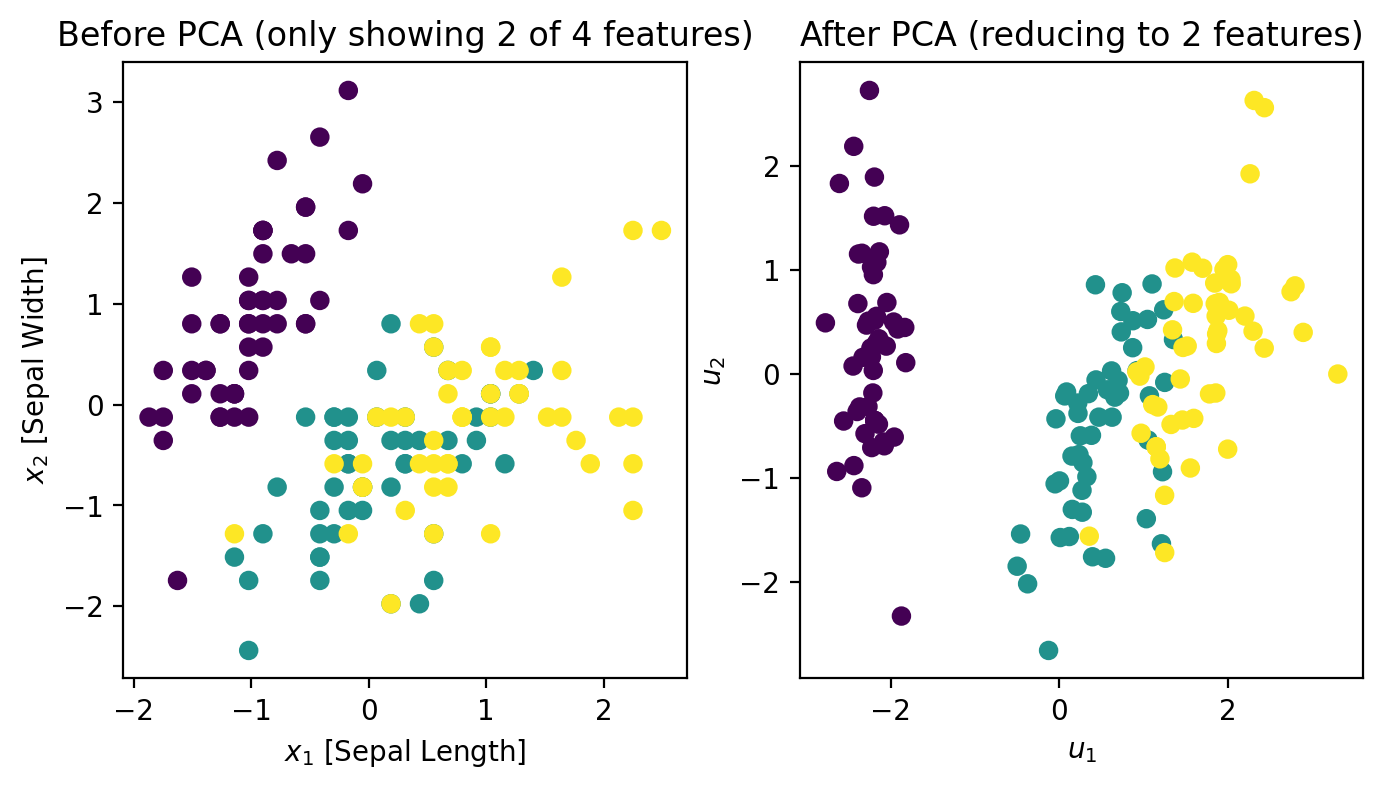

In [8]:
fig3

An important way to quantify the importance of each reduced feature vector $\mathbf{u}_1$ and $\mathbf{u}_2$ is to calculate the Explained Variance Ratio:

In [9]:
print(pca_model_with_2components.explained_variance_ratio_)

[0.72770452 0.23030523]


* This shows that the variance is maximized along the principal component 1 ($u_1$), as that component explains 73% of the variance

* Principal component 2 ($u_2$) only explains 22% of the variance.

* Together, they explain 95% of variance, indicating that the two components are almost sufficient to reconstruct the original dataset.

Finally, we can have an idea of the importance of each feature ($u_1$ and $u_2$) by looking at the magnitude of the corresponding values in the eigenvectors:

* Higher magnitude in the eigenvectors $\mathbf{w}_i$ means higher importance.

In [10]:
print(abs(pca_model_with_2components.components_))

[[0.52237162 0.26335492 0.58125401 0.56561105]
 [0.37231836 0.92555649 0.02109478 0.06541577]]


The first row corresponds to the eigenvector $\mathbf{w}_1$ that when multiplied by the input data $\mathbf{X}$ results in the reduced input data $\mathbf{u}_1$.

* So, feature $x_1$, $x_3$ and $x_4$ (in the original input space) are the most important for the latent feature $u_1$

* Similarly, feature $x_2$ and then $x_1$ are the most important for latent feature $u_2$

In [15]:
def biplot(score, coeff , y):
    # Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    #Inputs:
       #score: the projected data
       #coeff: the eigenvectors (PCs)
       #y: the class labels
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(6,6))
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("$u_{}$".format(1), size=14)
    plt.ylabel("$u_{}$".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

The figure below is called a **biplot**

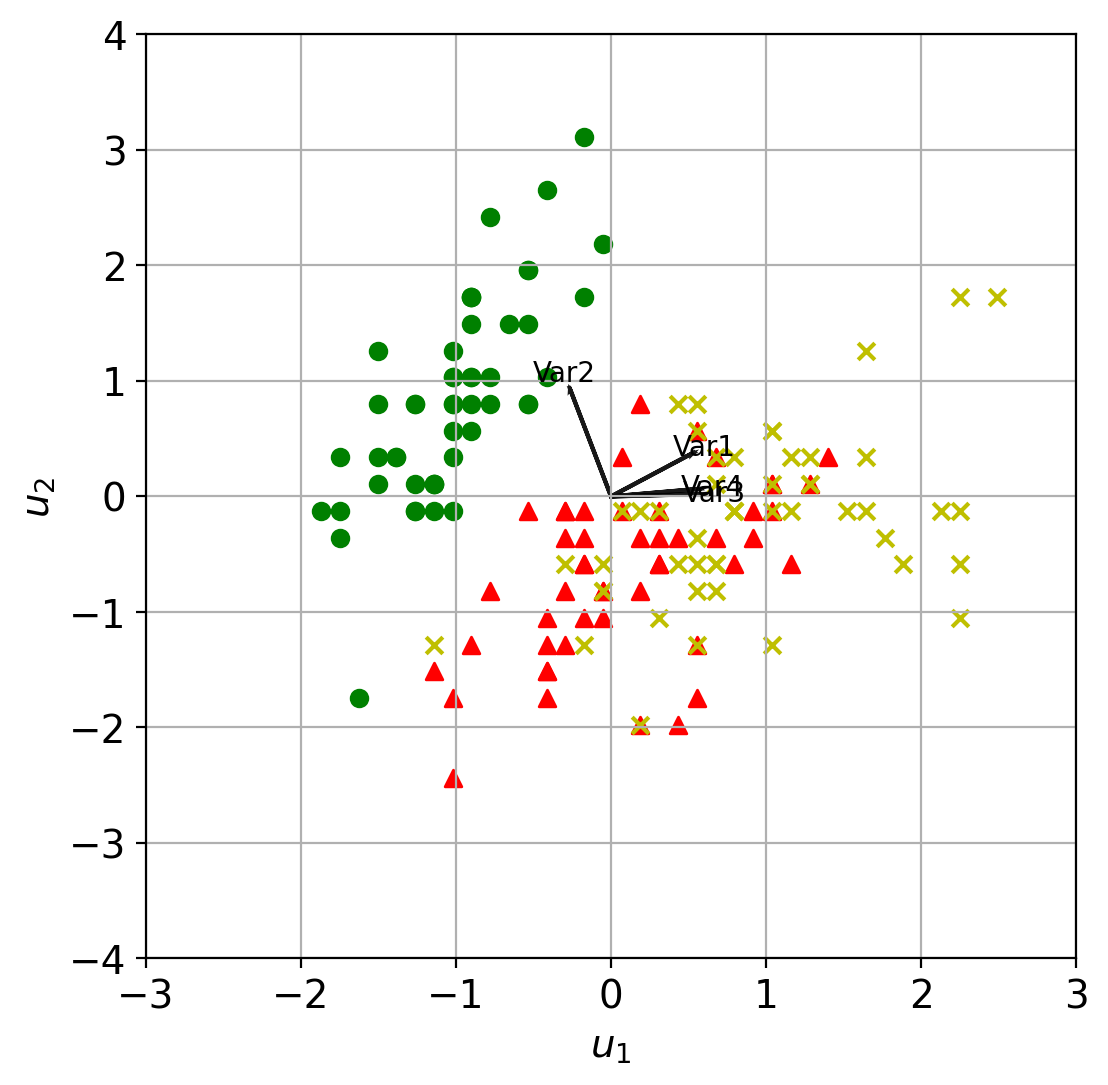

In [16]:
biplot(X_data_scaled[:,0:2], np.transpose(pca_model_with_2components.components_[0:2, :]), y_data)
plt.show()

The above figure is just another way to assess the impact of each $\mathbf{w}_i$ in reducing $\mathbf{x}_n$ to $\mathbf{u}_n$ (recall that $u_{ni} = \mathbf{w}_i^T \mathbf{x}_n$ for $i=1, ..., D_l$).

In the figure $\text{Var}_j = \begin{bmatrix}w_{1j}\\w_{2j}\end{bmatrix}$, i.e. the two components that multiply feature $x_{j}$ to get $u_1$ and $u_2$. The figure also shows that:

1. Feature $x_1$, $x_3$ and $x_4$ are the most important for the latent feature $u_1$.

2. Feature $x_2$ and then $x_1$ are the most important for the latent feature $u_2$.

* Arrows pointing in the **same direction** indicate **correlation between the variables that they represent**, i.e. variables $x_3$ and $x_4$ are well correlated (meaning that we might only need to keep one of them).

* Arrows **heading in opposite directions** indicate a **contrast between the variables they represent**.

### See you next class

Have fun!